In [30]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [31]:
df_2 = pd.read_csv("Cust_Segmentation.csv").copy()
df_2.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [32]:
df_2.index = df_2.iloc[:,0]
df_2.head()
del df_2.index.name
df_2 = df_2.drop(['Customer Id','Age','Years Employed','Card Debt','Other Debt','Defaulted','Address','Edu'], axis = 1)

In [33]:
df_2.head()

,Income,DebtIncomeRatio
1,19,6.3
2,100,12.8
3,57,20.9
4,19,6.3
5,253,7.2


In [34]:
# Uygun normalizasyon için aykırı değerlerin tespit edilmesi gerekir.

In [35]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,500.0,46.1480,34.652615,13.0,24.0,34.0,57.0,253.0
DebtIncomeRatio,500.0,10.2204,6.797319,0.1,5.0,8.9,13.9,41.3


In [36]:
df_income = df_2["Income"]
df_income.head()

1     19
2    100
3     57
4     19
5    253
Name: Income, dtype: int64

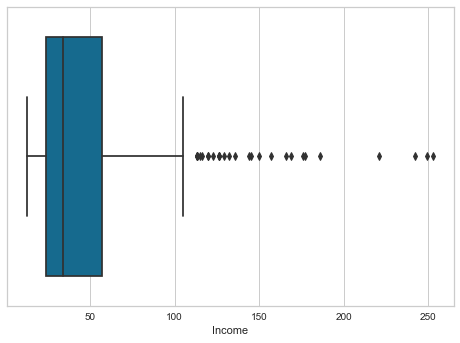

In [37]:
seaborn.boxplot(x = df_income); # aykırı değerleri boxplot ile yakalarız.

In [38]:
IQR_INCOME = 57.0 - 24.0

In [39]:
up_level_income = 57.0 + 1.5 * IQR_INCOME

In [40]:
up_level_income

106.5

In [41]:
down_level_income = 24.0 - 1.5 * IQR_INCOME

In [42]:
down_level_income

-25.5

In [43]:
#  Income değerinin min-max normalizasyonunda max değeri 106.5 alınacaktır.

In [44]:
df_2["Income"] = (df_2["Income"] - 13) / (253 - 13)

In [45]:
df_2.head()

,Income,DebtIncomeRatio
1,0.025000,6.3
2,0.362500,12.8
3,0.183333,20.9
4,0.025000,6.3
5,1.000000,7.2


In [46]:
# Borç Gelir Oranı değişkeni (DebtIncomeRatio) normalizasyonu. 

In [47]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,500.0,0.138117,0.144386,0.0,0.045833,0.0875,0.183333,1.0
DebtIncomeRatio,500.0,10.220400,6.797319,0.1,5.000000,8.9000,13.900000,41.3


In [48]:
# aynı şekilde değişkenin aykırı değerleri tespit edilir.

In [49]:
IQR_DEBT = 13.9 - 5
IQR_DEBT

8.9

In [50]:
up_level_debt = 13.9 + 1.5 * IQR_DEBT

In [51]:
up_level_debt

27.25

In [52]:
down_level_debt = 5 - 1.5 * IQR_DEBT
down_level_debt

-8.350000000000001

In [53]:
df_2["DebtIncomeRatio"] = (df_2["DebtIncomeRatio"] - 0.1) / (41.3 - 0.1)

In [54]:
df_2.head()

,Income,DebtIncomeRatio
1,0.025000,0.150485
2,0.362500,0.308252
3,0.183333,0.504854
4,0.025000,0.150485
5,1.000000,0.172330


In [55]:
df_2.head(100)

,Income,DebtIncomeRatio
1,0.025000,0.150485
2,0.362500,0.308252
3,0.183333,0.504854
4,0.025000,0.150485
5,1.000000,0.172330
6,0.283333,0.262136
7,0.179167,0.036408
8,0.212500,0.157767
9,0.020833,0.373786
10,0.425000,0.094660


In [56]:
# şimdi kümeleme için en iyi k değerini elbow yardımı ile bulalım.

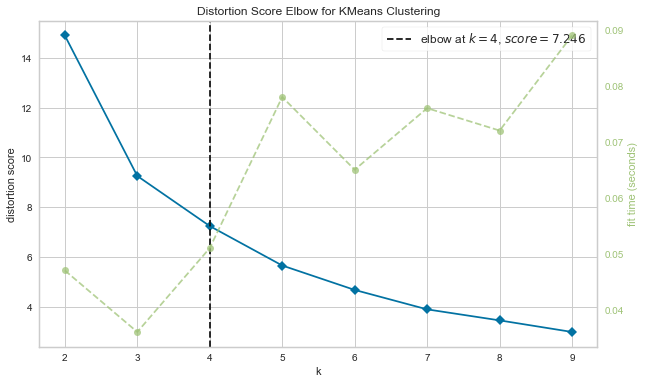

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
plt.figure(figsize=(10, 6))
visualizer = KElbowVisualizer(kmeans, k=(2,10)) # 2'den 10'a kadar olan küme sayılarını dene ve bir görselleştir.
visualizer.fit(df_2)
visualizer.poof()

In [77]:
# Elbow'a göre en optimum kümeleme sayısı 4.
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df_2)
clusters = k_fit.labels_

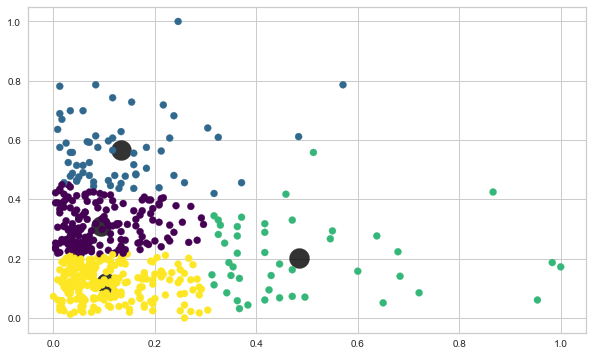

In [78]:
centers = k_fit.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 400, alpha = 0.8);
plt.scatter(df_2.iloc[:,0],df_2.iloc[:,1],c=clusters,cmap="viridis")

In [60]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,500.0,0.138117,0.144386,0.0,0.045833,0.087500,0.183333,1.0
DebtIncomeRatio,500.0,0.245641,0.164983,0.0,0.118932,0.213592,0.334951,1.0
